In [1]:
import cv2
import pytesseract

In [12]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [26]:
import numpy as np

In [4]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [5]:
im = cv2.imread('train_v2/train//TRAIN_00001.jpg')
config = ('-l eng --oem 1 --psm 3')
text = pytesseract.image_to_string(im, config=config)

In [7]:
def remove_items(test_list, item): 
    res = [i for i in test_list if i != item] 
    return res

In [6]:
def get_text(img_path):
    im = cv2.imread(img_path)
    config = ('-l eng --oem 1 --psm 3')
    text = pytesseract.image_to_string(im, config=config)
    text = text.split('\n')
    text=remove_items(text,'\x0c')
    text=remove_items(text,'')
    text=remove_items(text,' ')
    text_img=""
    for i in text:
        text_img=text_img+i+" "
    text_im2=""
    for i in range(len(text_img)):
        text_im2=text_im2+text_img[i]+' '
    return text_im2
    

In [45]:
def generate_img(img_width,img_height,img_color,text):
    img_size=(img_width,img_height)
    img = Image.new('RGB', img_size, color = img_color)
    d = ImageDraw.Draw(img)
    font = ImageFont.truetype('arial.ttf', 15) 
    d.text((10,10), text, font = font,fill=(0,0,0))
    #img = np.array(img)
    #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    #img = cv2.filter2D(img, -1, kernel)
    return img

In [37]:
img_width=190
img_height=30
img_color='white'
img_path='train_v2/train//TRAIN_00001.jpg'

In [46]:
text=get_text(img_path)
img=generate_img(img_width,img_height,img_color,text)

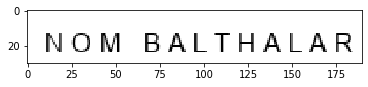

In [47]:
plt.imshow(img)

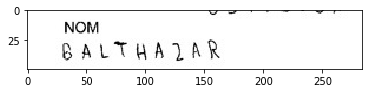

In [15]:
im2=cv2.imread(img_path)
plt.imshow(im2)